In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
appointment_data = pd.read_csv("./noshowappointments2016.csv")
appointment_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
appointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
appointment_data["PatientId"].duplicated().sum()

48228

In [13]:
appointment_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [15]:
appointment_data.isnull().sum().sort_values(ascending=False)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [16]:
to_drop=["PatientId", "AppointmentID"]

appointment_data.drop(columns=to_drop, inplace=True)

In [17]:
appointment_data.shape

(110527, 12)

In [19]:
appointment_data.drop_duplicates()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [20]:
appointment_data.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

C:\Users\baxti\AppData\Local\Temp\ipykernel_10780\1061184841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y=appointment_data["No-show"], kind="count", palette={"No": "#32a84e", "Yes": "#a0a832"})


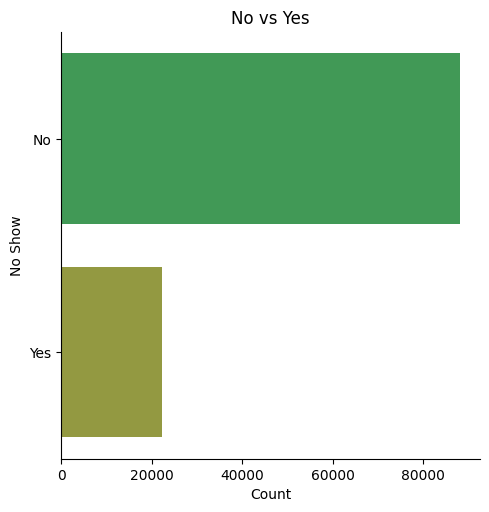

In [26]:
appointment_data["No-show"]

sns.catplot(y=appointment_data["No-show"], kind="count", palette={"No": "#32a84e", "Yes": "#a0a832"})
plt.title("No vs Yes")
plt.xlabel("Count")
plt.ylabel("No Show")
plt.show()

In [27]:
appointment_data.nunique()

Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [38]:
appointment_data["AppointmentDay"] = appointment_data["AppointmentDay"].str[:10]
appointment_data["ScheduledDay"] = appointment_data["ScheduledDay"].str[:10]

appointment_data["ScheduledDay"] = pd.to_datetime(appointment_data["ScheduledDay"])
appointment_data["AppointmentDay"] = pd.to_datetime(appointment_data["AppointmentDay"])


print(appointment_data[["AppointmentDay","ScheduledDay"]].dtypes)

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


In [ ]:
appointment_data["Due-Days"] =  appointment_data["AppointmentDay"] - appointment_data["ScheduledDay"] 
appointment_data["Due-Days"] =appointment_data["Due-Days"].dt.days


In [45]:
appointment_data.loc[appointment_data["Due-Days"] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Due-Days
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [47]:
# Since there can not be negative days, we will drop them straightly

appointment_data.drop(appointment_data.loc[appointment_data["Due-Days"] < 0].index, inplace=True)

In [49]:
# Replacing No-Show Column values to numberic values 0 and 1
# appointment_data["No-show"].replace({"No":0, "Yes":1})

appointment_data["No-show"] = appointment_data["No-show"].apply(lambda x: 1 if x == "Yes" else 0)

In [51]:
appointment_data.loc[appointment_data['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

In [54]:
# Droping inconsistan age values such as negative value ages

appointment_data.drop(appointment_data.loc[appointment_data["Age"] < 0].index, inplace=True)

How often do men go to hospitals compared to women? Which of them is more likely to show up?


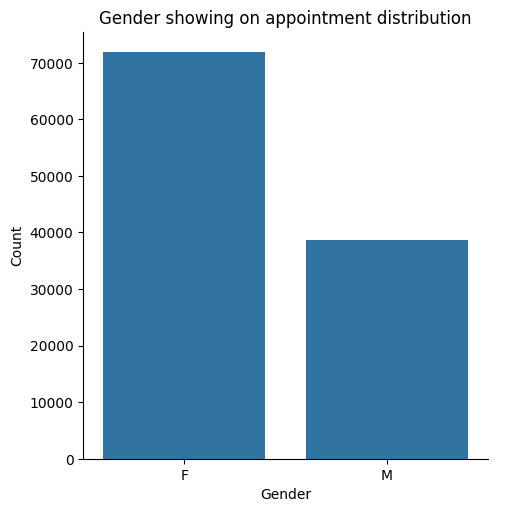

In [56]:
sns.catplot(x=appointment_data["Gender"], kind="count")
plt.title("Gender showing on appointment distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

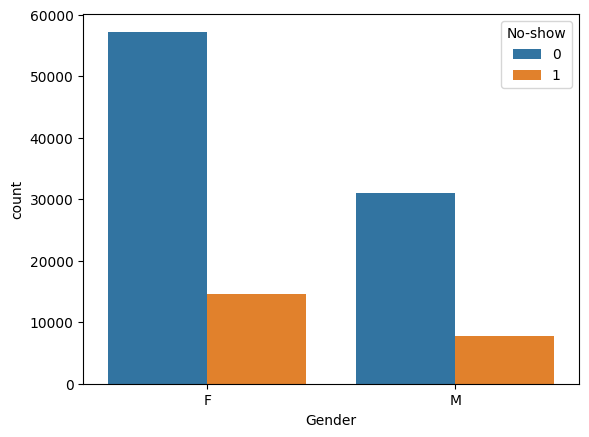

In [57]:
sns.countplot(x=appointment_data["Gender"], hue=appointment_data["No-show"])
plt.show()

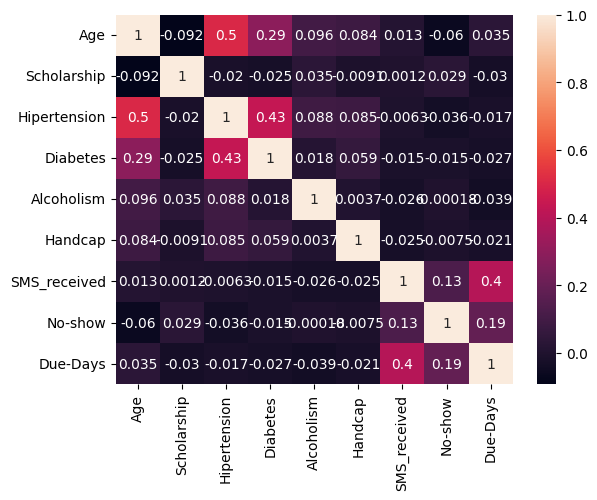

In [59]:
sns.heatmap(appointment_data.corr(numeric_only=True), annot=True)
plt.show()

In [60]:
appointment_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Due-Days'],
      dtype='object')

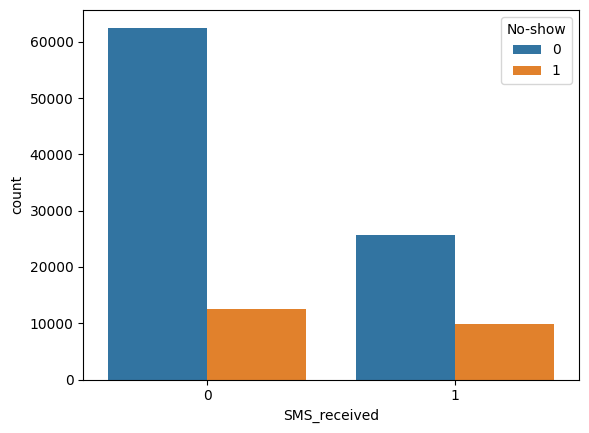

In [65]:
sns.countplot(x=appointment_data["SMS_received"], hue=appointment_data["No-show"])
plt.show()

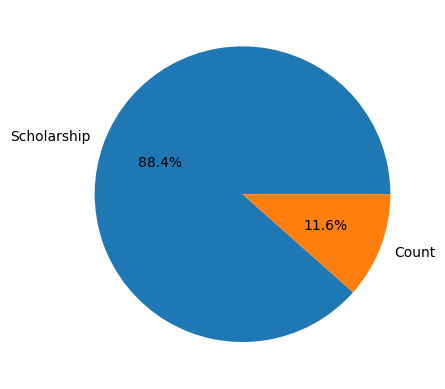

In [68]:
no_show_schor =appointment_data.groupby(appointment_data["Scholarship"])["No-show"].sum().reset_index(name="Count")

plt.pie(x=no_show_schor["Count"],labels=no_show_schor , autopct='%1.1f%%')
plt.show()

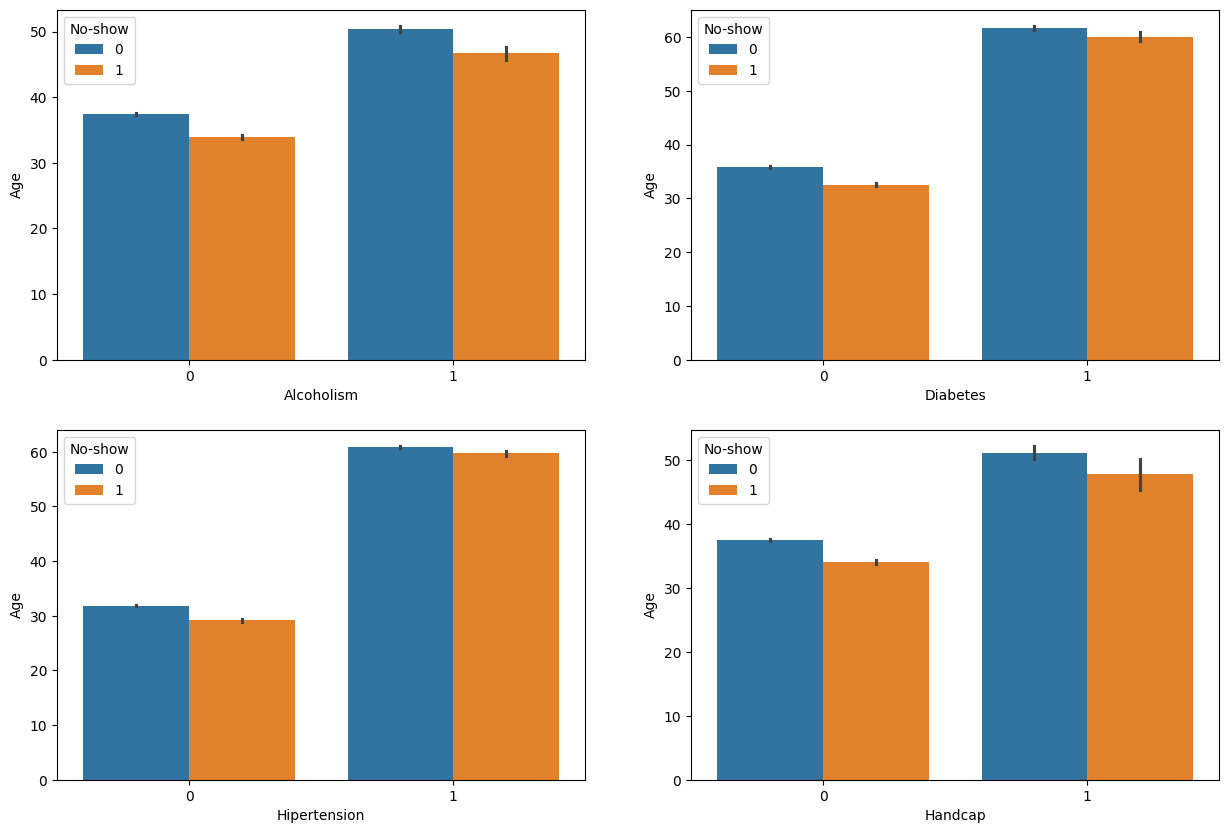

In [69]:
# Checking whether having a deciase affects to showing up

plt.figure(figsize=(15, 10))
plt.subplot(2, 2,1)
sns.barplot(x=appointment_data["Alcoholism"], y=appointment_data["Age"], hue=appointment_data["No-show"])
plt.subplot(2,2,2)
sns.barplot(x=appointment_data["Diabetes"], y=appointment_data["Age"], hue=appointment_data["No-show"])
plt.subplot(2,2,3)
sns.barplot(x=appointment_data["Hipertension"], y=appointment_data["Age"], hue=appointment_data["No-show"])
plt.subplot(2,2,4)
sns.barplot(x=appointment_data["Handcap"], y=appointment_data["Age"], hue=appointment_data["No-show"])
plt.show()

Text(0, 0.5, 'pattents number')

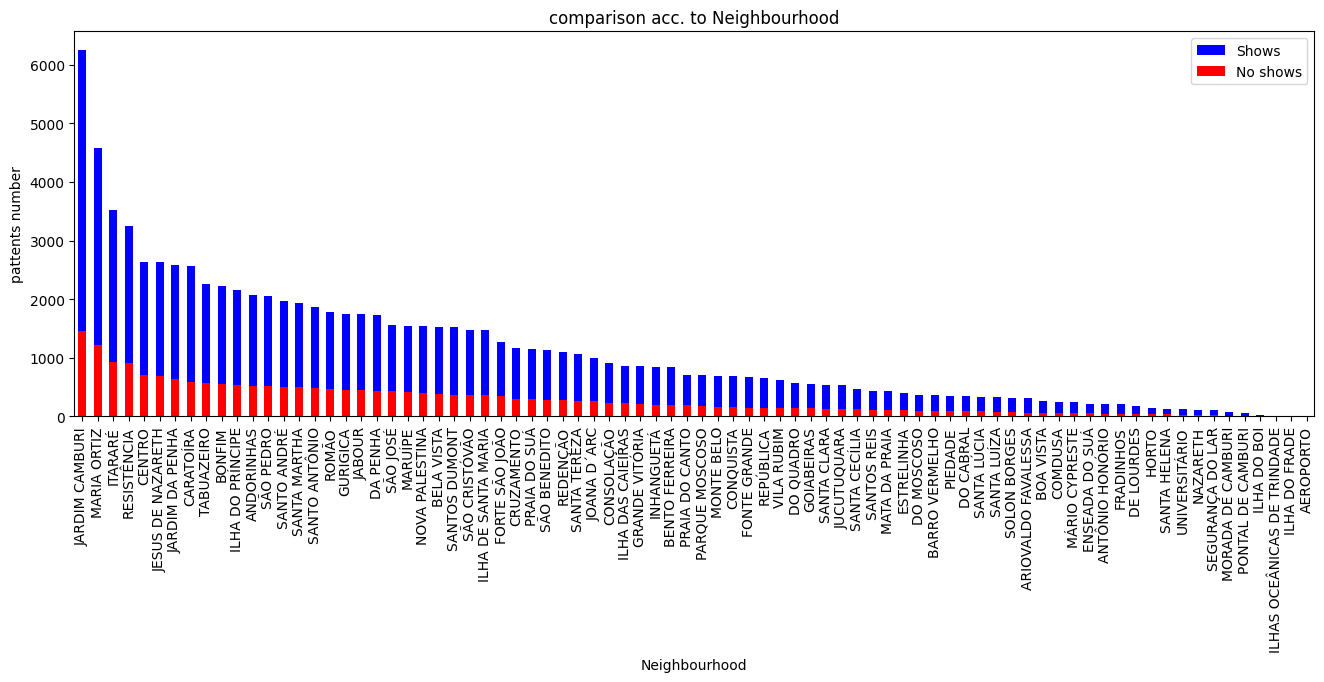

In [75]:
show=appointment_data["No-show"]==0
noshow=appointment_data["No-show"]==1

plt.figure(figsize=[16,5])
appointment_data.Neighbourhood[show].value_counts().plot(kind="bar",color="blue",label="Shows")
appointment_data.Neighbourhood[noshow].value_counts().plot(kind="bar",color="red",label="No shows")
plt.legend()
plt.title("comparison acc. to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("pattents number")

